# Forest area data in Switzerland by Cantons
[Site](https://opendata.swiss/fr/dataset/waldflachen-nach-kantonen5)

In [6]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd

In [76]:
excel_file_path = 'forest_area.xlsx'

# Load the Excel file and get all sheet names (which are years in your case)
excel_file = pd.ExcelFile(excel_file_path, engine='openpyxl')
sheet_names = excel_file.sheet_names  # List of sheet names (years)

# Initialize an empty list to store DataFrames for each year
dfs = []

# Loop over each sheet (year) and add the year as a new column
for sheet in sheet_names:
    # Read the current sheet into a DataFrame
    df = pd.read_excel(excel_file_path, sheet_name=sheet,header=1, nrows=34, engine='openpyxl')
    
    if sheet in ['je-f-07.03.02.01_2016','je-f-07.03.02.01_2015', 'je-f-07.03.02.01_2014','je-f-07.03.02.01_2013',
        'je-f-07.03.02.01_2012','je-f-07.03.02.01_2011', 'je-f-07.03.02.01_2010','je-f-07.03.02.01_2009', 
        'je-f-07.03.02.01_2008','je-f-07.03.02.01_2007', 'je-f-07.03.02.01_2006','je-f-07.03.02.01_2005']:  # Check if the current year is in the list
        df.rename(columns={'Propriétaires 1)': 'Propriétaires'}, inplace=True)
    #else:  # For other years, rename to the same standardized name
        #df.rename(columns={'OldColumnName': 'StandardizedColumnName'}, inplace=True)
    
    # Add a new column 'Year' and set its value to the current sheet name (year)
    df['Year'] = sheet
    
    # Append the DataFrame to the list
    dfs.append(df)

# Concatenate all the DataFrames into one big DataFrame
combined_df = pd.concat(dfs, ignore_index=True)

# Display the combined DataFrame
print(combined_df.head())

FileNotFoundError: [Errno 2] No such file or directory: 'forest_area.xlsx'

In [21]:
combined_df.rename(columns={'Unnamed: 0': 'Canton', # ou Région
    'Unnamed: 3':'Surface forestière totale en %' }, inplace=True)
combined_df.drop(['Unnamed: 6','Unnamed: 7'], axis=1, inplace=True)

In [24]:
combined_df.loc[:,'Canton']=combined_df['Canton'].astype(str)

In [28]:
for index, row in combined_df.iterrows():
    combined_df.at[index, 'Year'] = row['Year'][-4:]
    combined_df.at[index,'Canton'] = row['Canton'].rstrip()
    if combined_df.at[index,'Canton'].endswith('1)'):
        combined_df.at[index, 'Canton'] = row['Canton'][:-3]

In [29]:
combined_df['Canton'].unique()

array(['nan', 'Total', 'Région lémanique', 'Vaud', 'Valais', 'Genève',
       'Espace Mittelland', 'Berne', 'Fribourg', 'Soleure', 'Neuchâtel',
       'Jura', 'Suisse du Nord-Ouest', 'Basel-Ville', 'Basel-Campagne',
       'Argovie', 'Zurich', 'Suisse orientale', 'Glaris', 'Schaffhouse',
       'Appenzell Rh. Ext.', 'Appenzell Rh. Int.', 'Saint-Gall',
       'Grisons', 'Thurgovie', 'Suisse centrale', 'Lucerne', 'Uri',
       'Schwyz', 'Obwald', 'Nidwald', 'Zoug', 'Tessin',
       'Source : Office fédéral de la statistique - Statistique forestière suisse (FS)',
       'Remarque:'], dtype=object)

In [30]:
forest_area=combined_df.dropna()
forest_area.shape

(627, 7)

Pour chaque année, (il y en a 19), il y a deux rows qui ont des valeurs manquantes. Ainsi le dataframe perd 38 rows.

In [31]:
forest_area['Canton'].unique()

array(['nan', 'Total', 'Région lémanique', 'Vaud', 'Valais', 'Genève',
       'Espace Mittelland', 'Berne', 'Fribourg', 'Soleure', 'Neuchâtel',
       'Jura', 'Suisse du Nord-Ouest', 'Basel-Ville', 'Basel-Campagne',
       'Argovie', 'Zurich', 'Suisse orientale', 'Glaris', 'Schaffhouse',
       'Appenzell Rh. Ext.', 'Appenzell Rh. Int.', 'Saint-Gall',
       'Grisons', 'Thurgovie', 'Suisse centrale', 'Lucerne', 'Uri',
       'Schwyz', 'Obwald', 'Nidwald', 'Zoug', 'Tessin'], dtype=object)

## Visualization

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

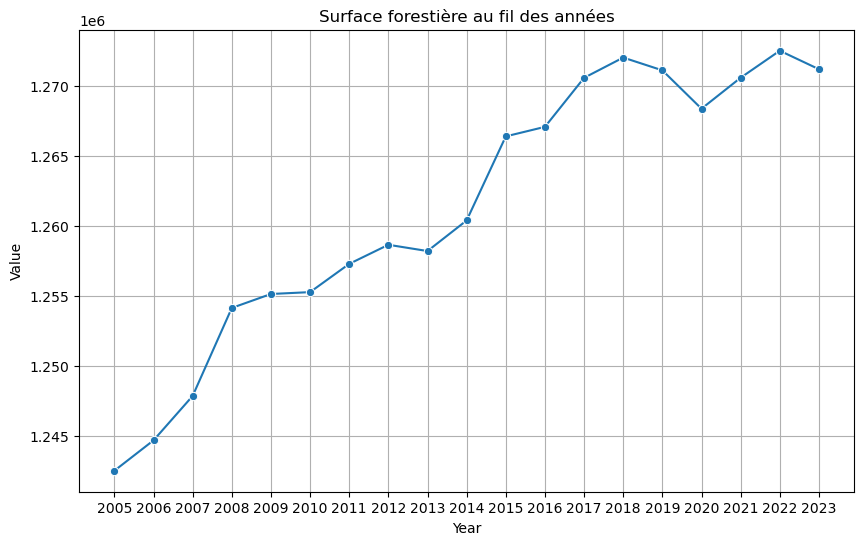

In [34]:
# Plot the data using seaborn
df_1 = forest_area[forest_area['Canton']=='Total'].sort_values(by='Year',ascending=True)
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_1, x='Year', y='Surface forestière totale', marker='o')
plt.title("Surface forestière au fil des années")
plt.xlabel("Year")
plt.ylabel("Value")
plt.grid()
plt.show()

# Subsidies for agriculture in Switzerland
[website for the database](https://www.atlas.bfs.admin.ch/maps/13/fr/6164_5873_5874_4801/10588.html)

Definition : Contributions versées par l'Etat aux exploitants agricoles à titre d'indemnité pour leurs prestations écologiques et d'intérêt général.

In [35]:
df_2005 = pd.read_csv('2005.csv',sep=';')
df_2006 = pd.read_csv('2006.csv',sep=';')
df_2007 = pd.read_csv('2007.csv',sep=';')
df_2008 = pd.read_csv('2008.csv',sep=';')
df_2009 = pd.read_csv('2009.csv',sep=';')
df_2010 = pd.read_csv('2010.csv',sep=';')
df_2011 = pd.read_csv('2011.csv',sep=';')
df_2012 = pd.read_csv('2012.csv',sep=';')
df_2013 = pd.read_csv('2013.csv',sep=';')
df_2014 = pd.read_csv('2014.csv',sep=';')
df_2015 = pd.read_csv('2015.csv',sep=';')
df_2016 = pd.read_csv('2016.csv',sep=';')
df_2017 = pd.read_csv('2017.csv',sep=';')
df_2018 = pd.read_csv('2018.csv',sep=';')
df_2019 = pd.read_csv('2019.csv',sep=';')
df_2020 = pd.read_csv('2020.csv',sep=';')
df_2021 = pd.read_csv('2021.csv',sep=';')
df_2022 = pd.read_csv('2022.csv',sep=';')
df_2023 = pd.read_csv('2023.csv',sep=';')

In [36]:
list_dfs = [df_2005,df_2006,df_2007,df_2008,df_2009,df_2010,df_2011,df_2012,
            df_2013,df_2014,df_2015,df_2016,df_2017,df_2018,df_2019,df_2020,
            df_2021,df_2022,df_2023]
for year, df in zip(range(2005,2024), list_dfs):
    df['Year'] = year  # Adding the 'Year' column
    
subs = pd.concat(list_dfs, ignore_index=True) #Concatenate all DataFrames into one
subs.rename(columns={'GEO_NAME':'Canton'},inplace=True)

In [43]:
print(subs['Canton'].unique())
print(forest_area['Canton'].unique())
print(subs.dtypes)
print(forest_area.dtypes)
print(subs.shape)
print(forest_area.shape)

['Zürich' 'Bern' 'Luzern' 'Uri' 'Schwyz' 'Obwalden' 'Nidwalden' 'Glarus'
 'Zug' 'Freiburg' 'Solothurn' 'Basel-Stadt' 'Basel-Landschaft'
 'Schaffhausen' 'Appenzell Ausserrhoden' 'Appenzell Innerrhoden'
 'St. Gallen' 'Graubünden' 'Aargau' 'Thurgau' 'Tessin' 'Waadt' 'Wallis'
 'Neuenburg' 'Genf' 'Jura']
['nan' 'Total' 'Région lémanique' 'Vaud' 'Valais' 'Genève'
 'Espace Mittelland' 'Berne' 'Fribourg' 'Soleure' 'Neuchâtel' 'Jura'
 'Suisse du Nord-Ouest' 'Basel-Ville' 'Basel-Campagne' 'Argovie' 'Zurich'
 'Suisse orientale' 'Glaris' 'Schaffhouse' 'Appenzell Rh. Ext.'
 'Appenzell Rh. Int.' 'Saint-Gall' 'Grisons' 'Thurgovie' 'Suisse centrale'
 'Lucerne' 'Uri' 'Schwyz' 'Obwald' 'Nidwald' 'Zoug' 'Tessin']
GEO_ID           int64
Canton          object
VARIABLE        object
VALUE          float64
UNIT            object
STATUS          object
STATUS_DESC     object
DESC_VAL       float64
PERIOD_REF      object
SOURCE          object
LAST_UPDATE     object
GEOM_CODE       object
GEOM            obje

In [58]:
subs['Canton'] = subs['Canton'].replace('Zürich', 'Zurich')
subs['Canton'] = subs['Canton'].replace('Bern', 'Berne')
subs['Canton'] = subs['Canton'].replace('Luzern', 'Lucerne')
subs['Canton'] = subs['Canton'].replace('St. Gallen', 'Saint-Gall')
subs['Canton'] = subs['Canton'].replace('Obwalden', 'Obwald')
subs['Canton'] = subs['Canton'].replace('Nidwalden', 'Nidwald')
subs['Canton'] = subs['Canton'].replace('Glarus', 'Glaris')
subs['Canton'] = subs['Canton'].replace('Zug', 'Zoug')
subs['Canton'] = subs['Canton'].replace('Freiburg', 'Fribourg')
subs['Canton'] = subs['Canton'].replace('Solothurn', 'Soleure')
subs['Canton'] = subs['Canton'].replace('Basel-Stadt', 'Basel-Ville')
subs['Canton'] = subs['Canton'].replace('Basel-Landschaft', 'Basel-Campagne')
subs['Canton'] = subs['Canton'].replace('Appenzell Ausserrhoden', 'Appenzell Rh. Ext.')
subs['Canton'] = subs['Canton'].replace('Appenzell Innerrhoden', 'Appenzell Rh. Int.')
subs['Canton'] = subs['Canton'].replace('Graubünden', 'Grisons')
subs['Canton'] = subs['Canton'].replace('Aargau', 'Argovie')
subs['Canton'] = subs['Canton'].replace('Thurgau', 'Thurgovie')
subs['Canton'] = subs['Canton'].replace('Waadt', 'Vaud')
subs['Canton'] = subs['Canton'].replace('Neuenburg', 'Neuchâtel')
subs['Canton'] = subs['Canton'].replace('Wallis', 'Valais')
subs['Canton'] = subs['Canton'].replace('Genf', 'Genève')
subs['Canton'] = subs['Canton'].replace('Schaffhausen', 'Schaffhouse')

In [38]:
forest_area['Canton'].unique()

array(['nan', 'Total', 'Région lémanique', 'Vaud', 'Valais', 'Genève',
       'Espace Mittelland', 'Berne', 'Fribourg', 'Soleure', 'Neuchâtel',
       'Jura', 'Suisse du Nord-Ouest', 'Basel-Ville', 'Basel-Campagne',
       'Argovie', 'Zurich', 'Suisse orientale', 'Glaris', 'Schaffhouse',
       'Appenzell Rh. Ext.', 'Appenzell Rh. Int.', 'Saint-Gall',
       'Grisons', 'Thurgovie', 'Suisse centrale', 'Lucerne', 'Uri',
       'Schwyz', 'Obwald', 'Nidwald', 'Zoug', 'Tessin'], dtype=object)

## Visualization

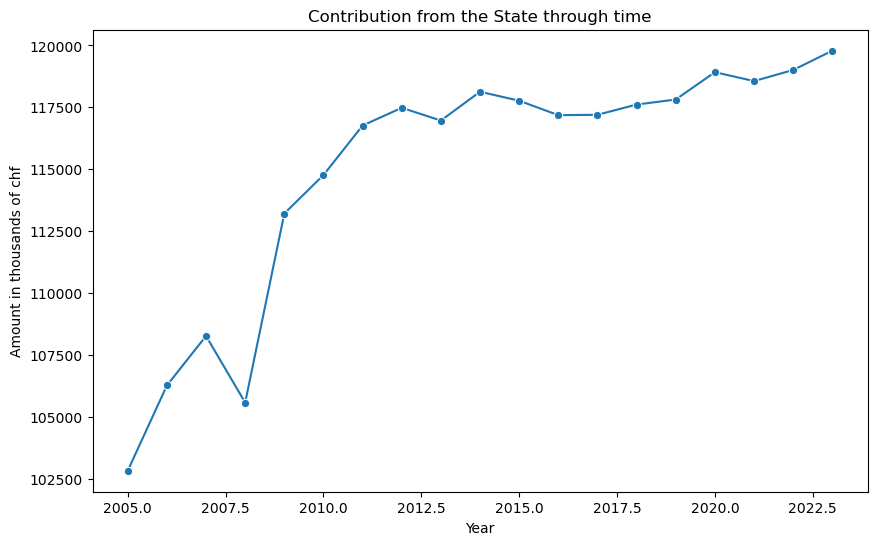

In [74]:
subs_chf = subs[subs['VARIABLE']=='Subventions en milliers de francs']
subs_avg= subs_chf.groupby(by='Year')['VALUE'].mean().reindex()
plt.figure(figsize=(10, 6))
sns.lineplot( x=subs_avg.index, y=subs_avg.values, marker='o')
plt.title("Contribution from the State through time")
plt.xlabel("Year")
plt.ylabel("Amount in thousands of chf")
plt.show()

# Correlation

In [59]:
forest_area.loc[:,'Year']=forest_area['Year'].astype(int)
merged = pd.merge(forest_area, subs, how='inner', on=['Year', 'Canton'])
merged #pour l'instant on a que les rows où le nom du canton est identique en suisse allemand et en français
        # il faut donc encore faire la traduction pour que les cantons se reconnaissent

,Canton,Propriétaires,Surface forestière totale,Surface forestière totale en %,Surface forestière productive,Surfaces forestières improductives,Year,GEO_ID,VARIABLE,VALUE,...,STATUS_DESC,DESC_VAL,PERIOD_REF,SOURCE,LAST_UPDATE,GEOM_CODE,GEOM,GEOM_PERIOD,MAP_ID,MAP_URL
0,Vaud,27252,126613,9.960077,94143,32470,2023,22,Subventions en milliers de francs,276791.0,...,Normaler Wert,NaN,2023-01-01/2023-12-31,BFS – Regionale Landwirtschaftliche Gesamtrech...,2023-11-09,kant,Cantons,2022-01-01,27356,https://www.atlas.bfs.admin.ch/maps/13/map/map...
1,Vaud,27252,126613,9.960077,94143,32470,2023,22,Subventions (en francs) par hectare**,2563.0,...,Normaler Wert,NaN,2023-01-01/2023-12-31,BFS – Regionale Landwirtschaftliche Gesamtrech...,2023-11-09,kant,Cantons,2022-01-01,27356,https://www.atlas.bfs.admin.ch/maps/13/map/map...
2,Valais,19903,109584,8.620482,90708,18876,2023,23,Subventions en milliers de francs,143587.0,...,Normaler Wert,NaN,2023-01-01/2023-12-31,BFS – Regionale Landwirtschaftliche Gesamtrech...,2023-11-09,kant,Cantons,2022-01-01,27356,https://www.atlas.bfs.admin.ch/maps/13/map/map...
3,Valais,19903,109584,8.620482,90708,18876,2023,23,Subventions (en francs) par hectare**,3959.0,...,Normaler Wert,NaN,2023-01-01/2023-12-31,BFS – Regionale Landwirtschaftliche Gesamtrech...,2023-11-09,kant,Cantons,2022-01-01,27356,https://www.atlas.bfs.admin.ch/maps/13/map/map...
4,Genève,1595,3003,0.236233,2599,404,2023,25,Subventions en milliers de francs,22973.0,...,Normaler Wert,NaN,2023-01-01/2023-12-31,BFS – Regionale Landwirtschaftliche Gesamtrech...,2023-11-09,kant,Cantons,2022-01-01,27356,https://www.atlas.bfs.admin.ch/maps/13/map/map...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,Nidwald,593,7758,0.624381,7079,679,2005,7,Subventions (en francs) par hectare**,3095.0,...,Normaler Wert,NaN,2005-01-01/2005-12-31,BFS – Regionale Landwirtschaftliche Gesamtrech...,2020-11-09,kant,Cantons,1997-01-01,10644,https://www.atlas.bfs.admin.ch/maps/13/map/map...
984,Zoug,833,6412,0.516052,6328,84,2005,9,Subventions en milliers de francs,25754.0,...,Normaler Wert,NaN,2005-01-01/2005-12-31,BFS – Regionale Landwirtschaftliche Gesamtrech...,2020-11-09,kant,Cantons,1997-01-01,10644,https://www.atlas.bfs.admin.ch/maps/13/map/map...
985,Zoug,833,6412,0.516052,6328,84,2005,9,Subventions (en francs) par hectare**,2359.0,...,Normaler Wert,NaN,2005-01-01/2005-12-31,BFS – Regionale Landwirtschaftliche Gesamtrech...,2020-11-09,kant,Cantons,1997-01-01,10644,https://www.atlas.bfs.admin.ch/maps/13/map/map...
986,Tessin,31036,142095,11.436125,127927,14168,2005,21,Subventions en milliers de francs,39827.0,...,Normaler Wert,NaN,2005-01-01/2005-12-31,BFS – Regionale Landwirtschaftliche Gesamtrech...,2020-11-09,kant,Cantons,1997-01-01,10644,https://www.atlas.bfs.admin.ch/maps/13/map/map...


In [60]:
merged.loc[:,'Surface forestière totale']=merged['Surface forestière totale'].astype(float)
#correlation = merged['Surface forestière totale'].corr(merged['VALUE'])
#print(correlation)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

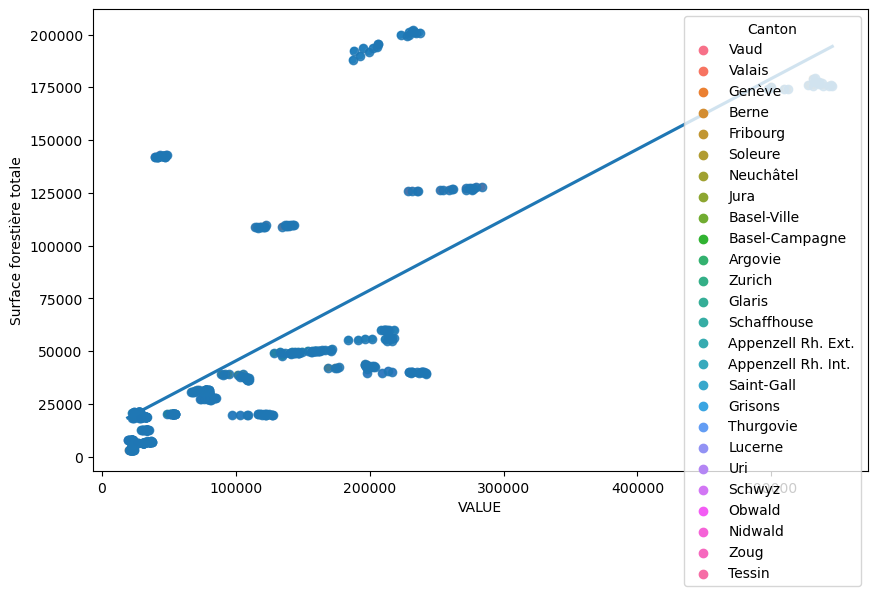

In [62]:
data_ = merged[merged['VARIABLE']=='Subventions en milliers de francs']
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_, x='VALUE', y='Surface forestière totale', marker='o',hue='Canton')
sns.regplot(x='VALUE', y='Surface forestière totale', data=data_)
plt.title("Surface forestière par rapport à la subvention")
plt.xlabel("Subvention")
plt.ylabel("Surface forestière")
plt.grid()
plt.show()